### Kimchi Data Set

### Import Libraries

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [18]:
df = pd.read_excel("/content/Kimchi_dataset.xlsx")

In [19]:
df.head(3)

,Date,Price,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes,Region
0,2018-03-25,1.71,2321.82,2006.46,1996.46,10.00,0.0,Seoul
1,2018-03-18,1.66,3154.45,2580.60,2577.27,3.33,0.0,Seoul
2,2018-03-11,1.68,2570.52,2209.29,2209.29,0.00,0.0,Seoul


In [20]:
df.shape

(648, 8)

### Lets explore our features...

There are categorical column as Region, and numeric columns as volume & boxes's features.

 Also, there are time dimension. 


Price will be label.

Price and total volume have missing values. Buts missing size is small, maybe I can delete them later.

In [21]:
feat_desc = pd.DataFrame({'Description': df.columns, 
                          'Values': [df[i].unique() for i in df.columns],
                          'Number of unique values': [len(df[i].unique()) for i in df.columns],
                         'Number of null values:': [df[i].isnull().sum() for i in df.columns]})
feat_desc

,Description,Values,Number of unique values,Number of null values:
0,Date,"[2018-03-25T00:00:00.000000000, 2018-03-18T00:...",12,0
1,Price,"[1.71, 1.66, 1.68, 1.48, 1.56, 1.43, 1.52, 1.3...",111,4
2,Total Volume,"[2321.82, 3154.45, 2570.52, 3851.3, 5356.63, 7...",648,1
3,Total Boxes,"[2006.46, 2580.6, 2209.29, 3242.98, 4007.48, 3...",648,0
4,Small Boxes,"[1996.46, 2577.27, 2209.29, 3239.65, 4007.48, ...",648,0
5,Large Boxes,"[10.0, 3.33, 0.0, 4906.58, 3841.8, 789.61, 147...",525,0
6,XLarge Boxes,"[0.0, 17.02, 58.42, 1.49, 1.47, 2.71, 5.86, 7....",43,0
7,Region,"[Seoul, Incheon, deagu, Anyang, Ulsan, Busan, ...",41,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


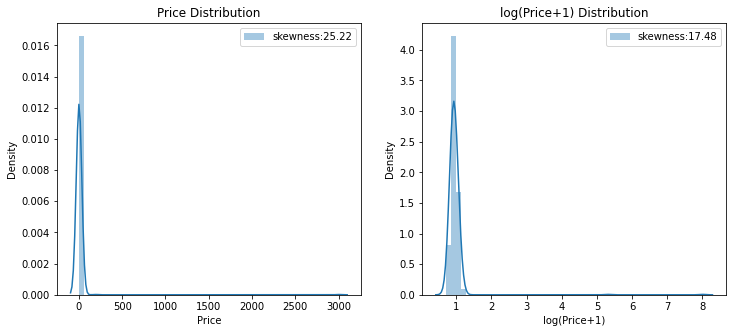

In [22]:
# # check distribution price in train set
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.distplot(df['Price'],hist = True,label='skewness:{:.2f}'.format(df['Price'].skew()),ax = ax1)
g1.legend()
g1.set(xlabel = 'Price', ylabel = 'Density', title = 'Price Distribution')
g2 = sns.distplot(np.log1p(df['Price']),hist = True,label='skewness:{:.2f}'.format(np.log1p(df['Price']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(Price+1)',ylabel = 'Density', title = 'log(Price+1) Distribution')
plt.show()

In [23]:
# Lets check data distribution by date.
df["Date"].value_counts()

2018-03-25    54
2018-03-18    54
2018-03-11    54
2018-03-04    54
2018-02-25    54
2018-02-18    54
2018-02-11    54
2018-02-04    54
2018-01-28    54
2018-01-21    54
2018-01-14    54
2018-01-07    54
Name: Date, dtype: int64

In [25]:
len(df[df["Date"]>="2018-03-15"])

108

In [27]:
len(df[df["Date"]<="2018-03-15"])

540

In [10]:
def get_date_features(df):
    """
    This function creates day and month feature from Date column.
    """
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    df.drop(columns=['Date'], inplace = True)

    return df
df = get_date_features(df)

In [11]:
# Our data period is weekly for 3 months.
df.groupby(["month","day"]).apply(len)

month  day
1      7      54
       14     54
       21     54
       28     54
2      4      54
       11     54
       18     54
       25     54
3      4      54
       11     54
       18     54
       25     54
dtype: int64

In [12]:
# Most of money come from Gwangmyeong. Maybe we can run 1 modek for Gwangmyeong and we can run 1 general model for other bc of volumes.
df.groupby('Region').agg({'Price': 'sum'})['Price'].nlargest(10).to_frame().reset_index().head(5)

,Region,Price
0,Gwangmyeong,3042.43
1,Daejon,217.74
2,Chungju,79.32
3,Gyeongju,43.60
4,Busan,41.51


In [13]:
df[df["Region"] == "Gwangmyeong"].describe()

,Price,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes,month,day
count,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,126.767917,6197.730833,3893.51875,2069.375833,1821.505833,2.637083,2.000000,15.500000
std,612.634876,1790.953870,1564.57204,1673.991959,795.427865,7.297706,0.834058,8.124038
min,1.490000,3788.910000,2162.34000,535.550000,16.670000,0.000000,1.000000,4.000000
25%,1.655000,4680.922500,2893.86750,718.885000,1625.510000,0.000000,1.000000,10.000000
50%,1.715000,6045.620000,3677.45500,1653.115000,1944.680000,0.000000,2.000000,16.000000
75%,1.762500,7262.427500,4500.28250,3027.780000,2209.977500,0.000000,3.000000,22.000000
max,3003.000000,11148.120000,9489.62000,7538.340000,3105.710000,29.410000,3.000000,28.000000


In [14]:
# When we see regions input distribution Gwangmyeong doesnt look special, high because 3003 price.
# So we dont need speacial model for  Gwangmyeong, we have to scale remove outlier or normalize  our data.
df.groupby(["Region"]).apply(len).to_frame().style.bar( color='#d65f5f')

,0
Region,
Andong,12
Anyang,12
Asan,12
Boryeong,24
Busan,24
Chungju,48
Daejon,12
Donghae,12
Gangeung,12


In [15]:
df.groupby(["Region"]).median()

,Price,Total Volume,Total Boxes,Small Boxes,Large Boxes,XLarge Boxes,month,day
Region,,,,,,,,
Andong,1.320,20572.225,16742.990,13870.450,1853.670,0.000,2.0,16.0
Anyang,1.830,29782.180,27226.210,23432.525,3482.500,0.000,2.0,16.0
Asan,1.300,8552.935,7456.195,7443.560,0.000,0.000,2.0,16.0
Boryeong,1.490,89637.655,62437.595,51421.265,4836.245,0.000,2.0,16.0
Busan,1.755,92541.340,39790.030,39701.605,66.990,0.000,2.0,16.0
Chungju,1.555,117661.695,74854.260,46839.610,17776.710,0.000,2.0,16.0
Daejon,1.685,39486.555,9170.985,9165.985,8.335,0.000,2.0,16.0
Donghae,1.805,8823.240,2578.580,2576.870,0.000,0.000,2.0,16.0
Gangeung,1.375,27069.680,21417.155,20099.480,1618.125,0.000,2.0,16.0


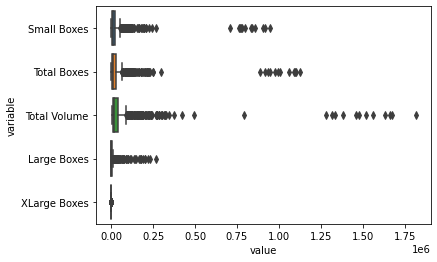

In [16]:
# Lets check numerical features distributions.
# Their range are differet, scaling is required.
sns.boxplot(y="variable", x="value", data=pd.melt(df[["Small Boxes","Total Boxes","Total Volume","Large Boxes","XLarge Boxes"]]))

plt.show()

### Lets write model code.